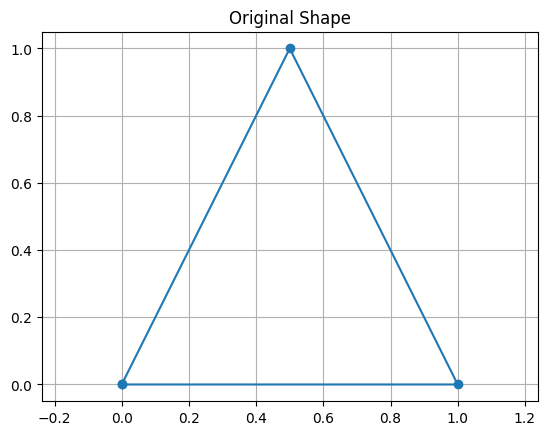

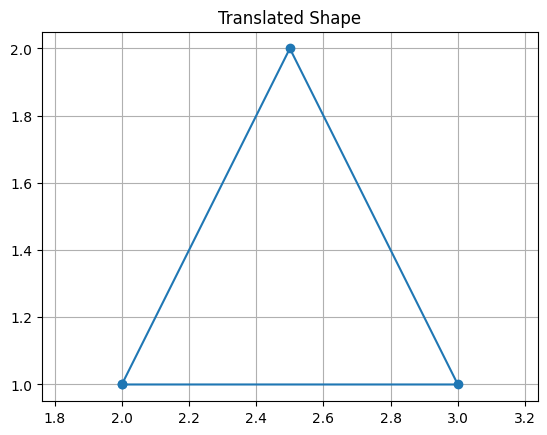

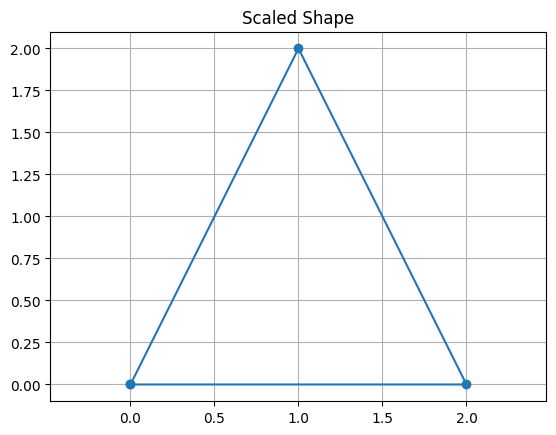

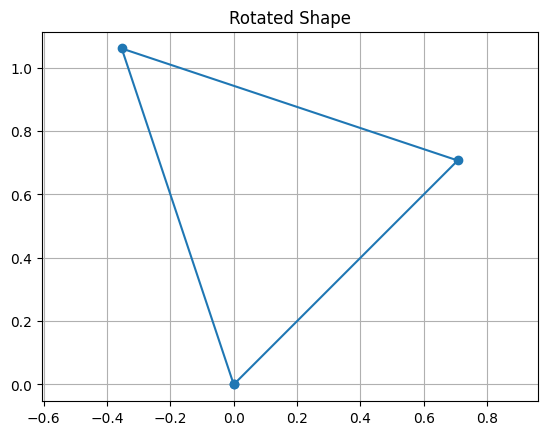

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_shape(shape, title):
    plt.figure()
    plt.plot(*zip(*shape, shape[0]), marker='o')
    plt.title(title)
    plt.grid()
    plt.axis('equal')
    plt.show()

def apply_transformation(shape, transformation_matrix):
    homogeneous_shape = np.hstack((shape, np.ones((shape.shape[0], 1))))
    transformed_shape = homogeneous_shape @ transformation_matrix.T
    return transformed_shape[:, :2]

# Define a triangle
triangle = np.array([[0, 0], [1, 0], [0.5, 1]])

# Translation matrix (tx=2, ty=1)
translation_matrix = np.array([
    [1, 0, 2],
    [0, 1, 1],
    [0, 0, 1]
])

# Scale matrix (sx=2, sy=2)
scale_matrix = np.array([
    [2, 0, 0],
    [0, 2, 0],
    [0, 0, 1]
])

# Rotate matrix (45 degrees)
theta = np.radians(45)
rotate_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])

# Apply transformations
plot_shape(triangle, "Original Shape")
translated_triangle = apply_transformation(triangle, translation_matrix)
plot_shape(translated_triangle, "Translated Shape")

scaled_triangle = apply_transformation(triangle, scale_matrix)
plot_shape(scaled_triangle, "Scaled Shape")

rotated_triangle = apply_transformation(triangle, rotate_matrix)
plot_shape(rotated_triangle, "Rotated Shape")

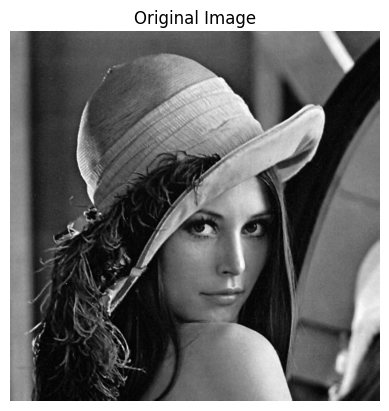

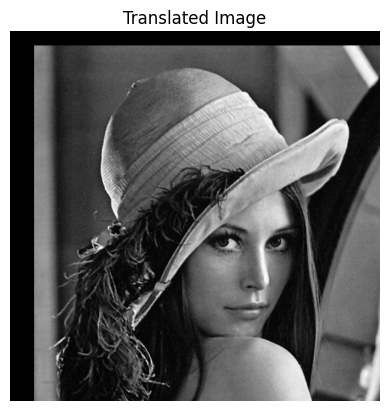

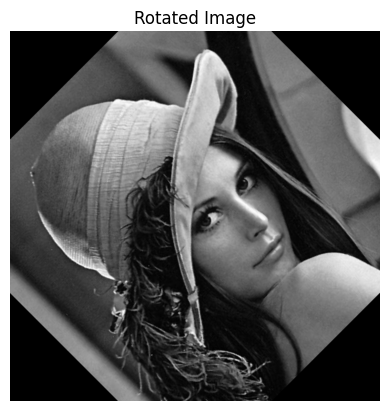

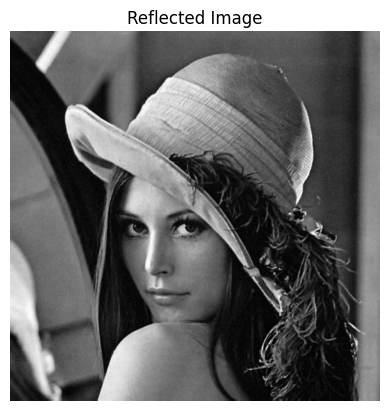

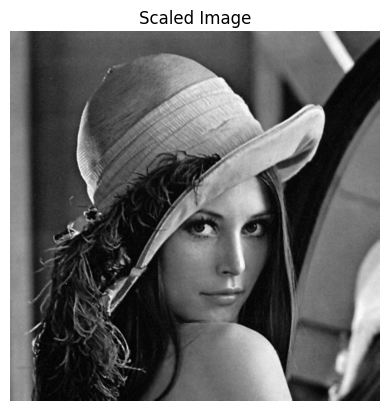

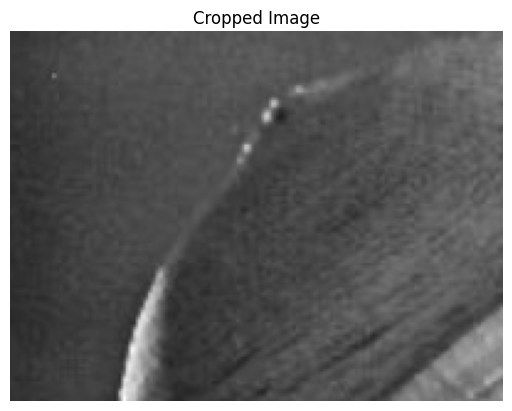

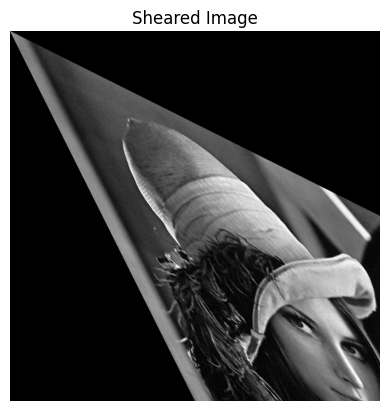

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(title, image):
    plt.figure()
    plt.title(title)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Load an image
image = cv2.imread('image_1.jpeg')
show_image("Original Image", image)

# Translation
tx, ty = 50, 30
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
show_image("Translated Image", translated_image)

# Rotation
angle = 45
center = (image.shape[1] // 2, image.shape[0] // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
show_image("Rotated Image", rotated_image)

# Reflection
flipped_image = cv2.flip(image, 1)  # Horizontal flip
show_image("Reflected Image", flipped_image)

# Scaling
scaled_image = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
show_image("Scaled Image", scaled_image)

# Cropping
cropped_image = image[50:200, 100:300]
show_image("Cropped Image", cropped_image)

# Shearing
M = np.float32([[1, 0.5, 0], [0.5, 1, 0]])
sheared_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
show_image("Sheared Image", sheared_image)